# Classification problem with breast cancer data

This jupyter notebook shows how we get the results that are presented in the report. 

Import modules

In [96]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from random import random, seed
from pandas import DataFrame
import scikitplot.metrics as skplt


#import functions
import matplotlib.pyplot as plt
from functions.neuralnetwork import NeuralNetwork
from functions.functions import *
#####################
#Simple filter for sklearn
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
#####################
#vizualization
import seaborn as sns
sns.set()
#####################

Load breast cancer data and set up training and test data.

In [97]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)

Scale the data

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Logistic regression

### Own code for logistic regression

In [99]:
import tqdm as tqdm
n = len(X_train)
M = 10
m = int(n/M)

t0, t1 = 1, 50
#y_train_onehot = to_categorical_numpy(y_train)

beta = np.random.randn(len(X_train[0,:]),1)
costfunction_best = 100000
for n_epochs in tqdm.tqdm(range(0,100,5)):
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_train[random_index:random_index+1]
            yi = y_train[random_index:random_index+1]

            gradients = 2 * xi.T @ ((xi @ beta)-yi)
            eta = learning_schedule(epoch*m+i)
            beta = beta - eta*gradients

            Xbeta = X_train.dot(beta)
            costfunction = y_train.dot( Xbeta ) - np.log( 1 + np.exp( Xbeta )  )
            costfunction = -np.sum(costfunction)

            p = np.exp(Xbeta)/(1+np.exp(Xbeta))
            if (costfunction) < (costfunction_best):
                #print(costfunction)
                costfunction_best = costfunction
                best_beta = beta
                best_n_epochs = n_epochs

y_train_prob = np.zeros((len(y_train),2))
y_test_prob  = np.zeros((len(y_test), 2))

y_train_pred = X_train.dot(best_beta)
y_test_pred  = X_test.dot(best_beta)

y_train_pred = sigmoid(y_train_pred)
y_test_pred  = sigmoid(y_test_pred)

for i in range(len(y_train)):
    y_train_prob[i,0] = y_train_pred[i]
    y_train_prob[i,1] = 1 - y_train_pred[i]

I=0
for i in range(len(y_test)):
    y_test_prob[i][0] = y_test_pred[i]
    y_test_prob[i][1] = 1 - y_test_prob[i][0]
    
    if y_test_pred[i]>=0.5:
        y_test_pred[i]=1
    else:
        y_test_pred[i]=0

    if y_test_pred[i] == y_test[i]:
        I += 1.
#print (y_pred)
accuracy_score = float(I/len(y_test_pred[:,0]))

#print (y_test_prob)

print ("Accuracy score on test set:", accuracy_score)
print ("Number of epochs:", best_n_epochs)

100%|██████████| 20/20 [00:07<00:00,  2.78it/s]

Accuracy score on test set: 0.8461538461538461
Number of epochs: 5


/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


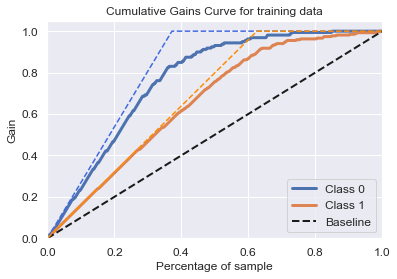

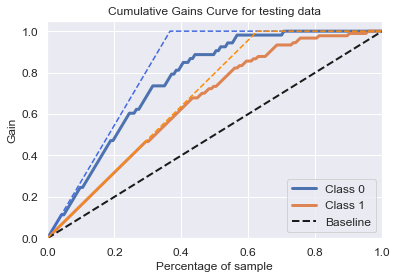

In [102]:
x0,y0 = best_curve(y_train,0)
x1,y1 = best_curve(y_train,1)
skplt.plot_cumulative_gain(y_train,-y_train_prob)
plt.title("Cumulative Gains Curve for training data")
plt.plot(x0,y0,'--',color='royalblue')
plt.plot(x1,y1,'--',color='darkorange')
plt.ylim(0,1.05)
plt.savefig("plots/classification/logreg_training_cumulative.pdf")
plt.show()

x0,y0 = best_curve(y_test,0)
x1,y1 = best_curve(y_test,1)

skplt.plot_cumulative_gain(y_test,-y_test_prob)
plt.title("Cumulative Gains Curve for testing data")
plt.ylim(0,1.05)
plt.plot(x0,y0,'--',color='royalblue')
plt.plot(x1,y1,'--',color='darkorange')
plt.savefig("plots/classification/logreg_test_cumulative.pdf")
plt.show()


### Compare with sklearn:

In [103]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(logreg.score(X_test,y_test)))
y_train_prob = logreg.predict_proba(X_train)
y_test_prob = logreg.predict_proba(X_test)

Test set accuracy: 0.96


/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


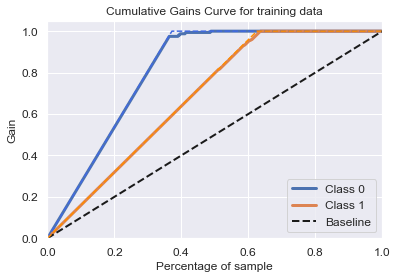

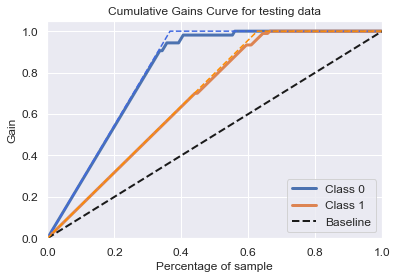

In [104]:
x0,y0 = best_curve(y_train,0)
x1,y1 = best_curve(y_train,1)
skplt.plot_cumulative_gain(y_train,y_train_prob)
plt.title("Cumulative Gains Curve for training data")
plt.plot(x0,y0,'--',color='royalblue')
plt.plot(x1,y1,'--',color='darkorange')
plt.ylim(0,1.05)
plt.savefig("plots/classification/sklearn_logreg_training_cumulative.pdf")
plt.show()

x0,y0 = best_curve(y_test,0)
x1,y1 = best_curve(y_test,1)

skplt.plot_cumulative_gain(y_test,y_test_prob)
plt.title("Cumulative Gains Curve for testing data")
plt.ylim(0,1.05)
plt.plot(x0,y0,'--',color='royalblue')
plt.plot(x1,y1,'--',color='darkorange')
plt.savefig("plots/classification/sklearn_logreg_test_cumulative.pdf")
plt.show()

As seen above, sklearn's logistic regression class is superior compared to our homemade logistic regression.

## Neural Network

Building our neural network and giving variables.

In [28]:
n_inputs, n_features = X_train.shape
n_hidden_neurons = 50
n_categories = 2
n_hidden_layers = 2

epochs = 300
batch_size = 100

y_train_onehot = to_categorical_numpy(y_train)

eta_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 1, 7)

train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

# store the models for later use
DNN_numpy = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)


best_data = 0
# grid search
for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        dnn = NeuralNetwork(X_data = X_train, Y_data = y_train_onehot, n_hidden_layers=n_hidden_layers,
                            n_hidden_neurons=n_hidden_neurons, n_categories = n_categories,
                            epochs = epochs, batch_size=batch_size, eta=eta, lmbd=lmbd,
                            user_action = 'classification')
        dnn.train()

        DNN_numpy[i][j] = dnn

        train_pred = dnn.predict(X_train)
        test_pred = dnn.predict(X_test)

        train_accuracy[i][j] = accuracy_score_numpy(y_train, train_pred)
        test_accuracy[i][j] = accuracy_score_numpy(y_test, test_pred)
        print("Learning rate  = ", eta)
        print("Lambda = ", lmbd)
        print("Accuracy score on test set: ", test_accuracy[i][j])
        print()

        #cumulative gain plot
        if test_accuracy[i][j] > best_data:
            best_data = test_accuracy[i][j]
            test_pred_prob = dnn.predict_probabilities(X_test)
            train_pred_prob= dnn.predict_probabilities(X_train)



Learning rate  =  1e-05
Lambda =  1e-05
Accuracy score on test set:  0.916083916083916

Learning rate  =  1e-05
Lambda =  0.0001
Accuracy score on test set:  0.6923076923076923

Learning rate  =  1e-05
Lambda =  0.001
Accuracy score on test set:  0.8741258741258742

Learning rate  =  1e-05
Lambda =  0.01
Accuracy score on test set:  0.7692307692307693

Learning rate  =  1e-05
Lambda =  0.1
Accuracy score on test set:  0.9300699300699301

Learning rate  =  1e-05
Lambda =  1.0
Accuracy score on test set:  0.8461538461538461

Learning rate  =  1e-05
Lambda =  10.0
Accuracy score on test set:  0.6853146853146853

Learning rate  =  0.0001
Lambda =  1e-05
Accuracy score on test set:  0.9370629370629371

Learning rate  =  0.0001
Lambda =  0.0001
Accuracy score on test set:  0.951048951048951

Learning rate  =  0.0001
Lambda =  0.001
Accuracy score on test set:  0.951048951048951

Learning rate  =  0.0001
Lambda =  0.01
Accuracy score on test set:  0.951048951048951

Learning rate  =  0.0001
L

/Users/ohebbi/Documents/UiO /H19/FYS-STK4155/project2/functions/functions.py:128: RuntimeWarning: overflow encountered in exp
  return 1./(1.+np.exp(-x))


Learning rate  =  0.01
Lambda =  1e-05
Accuracy score on test set:  0.958041958041958

Learning rate  =  0.01
Lambda =  0.0001
Accuracy score on test set:  0.951048951048951

Learning rate  =  0.01
Lambda =  0.001
Accuracy score on test set:  0.958041958041958

Learning rate  =  0.01
Lambda =  0.01
Accuracy score on test set:  0.965034965034965

Learning rate  =  0.01
Lambda =  0.1
Accuracy score on test set:  0.965034965034965

Learning rate  =  0.01
Lambda =  1.0
Accuracy score on test set:  0.965034965034965

Learning rate  =  0.01
Lambda =  10.0
Accuracy score on test set:  0.9230769230769231

Learning rate  =  0.1
Lambda =  1e-05
Accuracy score on test set:  0.9440559440559441

Learning rate  =  0.1
Lambda =  0.0001
Accuracy score on test set:  0.951048951048951

Learning rate  =  0.1
Lambda =  0.001
Accuracy score on test set:  0.958041958041958

Learning rate  =  0.1
Lambda =  0.01
Accuracy score on test set:  0.9440559440559441

Learning rate  =  0.1
Lambda =  0.1
Accuracy scor

/Users/ohebbi/Documents/UiO /H19/FYS-STK4155/project2/functions/hiddenlayer.py:23: RuntimeWarning: overflow encountered in matmul
  self.z_h = np.matmul(X_data, self.weights) + self.bias
/Users/ohebbi/Documents/UiO /H19/FYS-STK4155/project2/functions/hiddenlayer.py:23: RuntimeWarning: invalid value encountered in matmul
  self.z_h = np.matmul(X_data, self.weights) + self.bias
/Users/ohebbi/Documents/UiO /H19/FYS-STK4155/project2/functions/hiddenlayer.py:54: RuntimeWarning: overflow encountered in multiply
  self.weights_gradient += lmbd * self.weights


Learning rate  =  1.0
Lambda =  10.0
Accuracy score on test set:  0.3706293706293706

Learning rate  =  10.0
Lambda =  1e-05
Accuracy score on test set:  0.3706293706293706

Learning rate  =  10.0
Lambda =  0.0001
Accuracy score on test set:  0.6293706293706294

Learning rate  =  10.0
Lambda =  0.001
Accuracy score on test set:  0.6293706293706294

Learning rate  =  10.0
Lambda =  0.01
Accuracy score on test set:  0.6293706293706294

Learning rate  =  10.0
Lambda =  0.1
Accuracy score on test set:  0.6293706293706294



/Users/ohebbi/Documents/UiO /H19/FYS-STK4155/project2/functions/hiddenlayer.py:57: RuntimeWarning: overflow encountered in multiply
  self.weights -= eta * self.weights_gradient
/Users/ohebbi/Documents/UiO /H19/FYS-STK4155/project2/functions/hiddenlayer.py:47: RuntimeWarning: invalid value encountered in matmul
  self.error_hidden = np.matmul(error_output, weights.T) * self.a_h * (1 - self.a_h)


Learning rate  =  10.0
Lambda =  1.0
Accuracy score on test set:  0.3706293706293706

Learning rate  =  10.0
Lambda =  10.0
Accuracy score on test set:  0.3706293706293706



Now we would like to plot our results.

/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


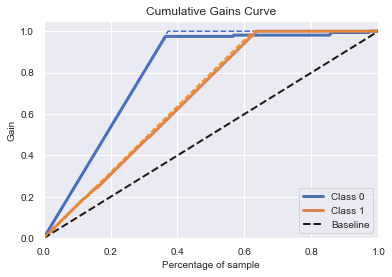

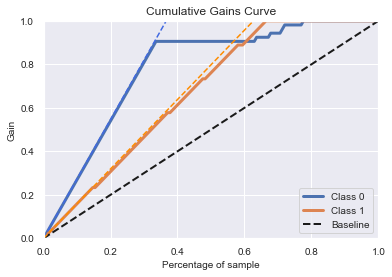

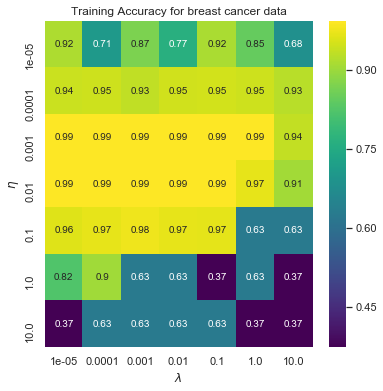

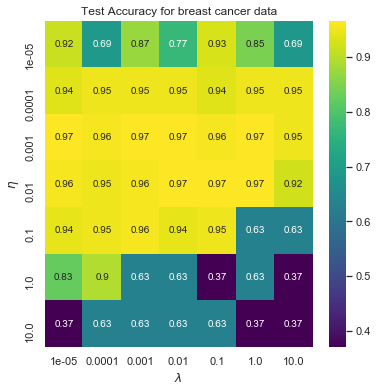

In [29]:

x0,y0 = best_curve(y_train,0)
x1,y1 = best_curve(y_train,1)
    
skplt.plot_cumulative_gain(y_train,train_pred_prob)
plt.plot(x0,y0,'--',color='royalblue')
plt.plot(x1,y1,'--',color='darkorange')
plt.ylim(0,1.05)
plt.show()

x0,y0 = best_curve(y_test,0)
x1,y1 = best_curve(y_test,1)

skplt.plot_cumulative_gain(y_test,test_pred_prob)
plt.plot(x0,y0,'--',color='royalblue')
plt.plot(x1,y1,'--',color='darkorange')
plt.ylim(0,1.05)
plt.show()
train_accuracy = DataFrame(train_accuracy, index = eta_vals, columns = lmbd_vals)


fig, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy for breast cancer data")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

test_accuracy = DataFrame(test_accuracy, index = eta_vals, columns = lmbd_vals)

fig, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy for breast cancer data")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

### But which parameters give the best results? 

We will run the same programs as above, but this time we will change the parameters to try and find the optimal model, even though the test set is already delievering quite good results.

In [105]:
n_inputs, n_features = X_train.shape
n_hidden_neurons = 50
n_categories = 2
n_hidden_layers = 2

epochs = 300
batch_size = 100

y_train_onehot = to_categorical_numpy(y_train)

eta_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 1, 7)

# store the models for later use
DNN_numpy = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)


In [109]:
def run_neuralnetwork(printing = False):
    train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
    test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
    best_data = 0
    for i, eta in enumerate(eta_vals):
        for j, lmbd in enumerate(lmbd_vals):
            dnn = NeuralNetwork(X_data = X_train, Y_data = y_train_onehot, n_hidden_layers=n_hidden_layers,
                                n_hidden_neurons=n_hidden_neurons, n_categories = n_categories,
                                epochs = epochs, batch_size=batch_size, eta=eta, lmbd=lmbd,
                                user_action = 'classification')
            dnn.train()

            DNN_numpy[i][j] = dnn

            train_pred = dnn.predict(X_train)
            test_pred = dnn.predict(X_test)
            
            train_accuracy[i][j] = accuracy_score_numpy(y_train, train_pred)
            test_accuracy[i][j] = accuracy_score_numpy(y_test, test_pred)
            if printing:
                print("Learning rate  = ", eta)
                print("Lambda = ", lmbd)
                print("Accuracy score on test set: ", test_accuracy[i][j])
                print()

            #cumulative gain plot
            if test_accuracy[i][j] > best_data:
                best_data = test_accuracy[i][j]
                test_pred_prob = dnn.predict_probabilities(X_test)
                train_pred_prob= dnn.predict_probabilities(X_train)

    x0,y0 = best_curve(y_train,0)
    x1,y1 = best_curve(y_train,1)
    
    skplt.plot_cumulative_gain(y_train,train_pred_prob)
    plt.plot(x0,y0,'--',color='royalblue')
    plt.plot(x1,y1,'--',color='darkorange')
    plt.ylim(0,1.05)
    plt.show()
    
    x0,y0 = best_curve(y_test,0)
    x1,y1 = best_curve(y_test,1)
    
    skplt.plot_cumulative_gain(y_test,test_pred_prob)
    plt.plot(x0,y0,'--',color='royalblue')
    plt.plot(x1,y1,'--',color='darkorange')
    plt.ylim(0,1.05)
    plt.show()
    
    
    
    train_accuracy = DataFrame(train_accuracy, index = eta_vals, columns = lmbd_vals)

    fig, ax = plt.subplots(figsize = (6, 6))
    sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
    ax.set_title("Training Accuracy for breast cancer data")
    ax.set_ylabel("$\eta$")
    ax.set_xlabel("$\lambda$")
    plt.show()

    test_accuracy = DataFrame(test_accuracy, index = eta_vals, columns = lmbd_vals)

    fig, ax = plt.subplots(figsize = (6, 6))
    sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
    ax.set_title("Test Accuracy for breast cancer data")
    ax.set_ylabel("$\eta$")
    ax.set_xlabel("$\lambda$")
    plt.show()

Can we improve the accuracy by changing the parameters? Let's start with number of hidden layers.

  0%|          | 0/9 [00:00<?, ?it/s]

Number of hidden layers: 1


/Users/ohebbi/Documents/UiO /H19/FYS-STK4155/project2/functions/functions.py:128: RuntimeWarning: overflow encountered in exp
  return 1./(1.+np.exp(-x))
/Users/ohebbi/Documents/UiO /H19/FYS-STK4155/project2/functions/hiddenlayer.py:23: RuntimeWarning: overflow encountered in matmul
  self.z_h = np.matmul(X_data, self.weights) + self.bias
/Users/ohebbi/Documents/UiO /H19/FYS-STK4155/project2/functions/hiddenlayer.py:23: RuntimeWarning: invalid value encountered in matmul
  self.z_h = np.matmul(X_data, self.weights) + self.bias
/Users/ohebbi/Documents/UiO /H19/FYS-STK4155/project2/functions/hiddenlayer.py:54: RuntimeWarning: overflow encountered in multiply
  self.weights_gradient += lmbd * self.weights
/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false

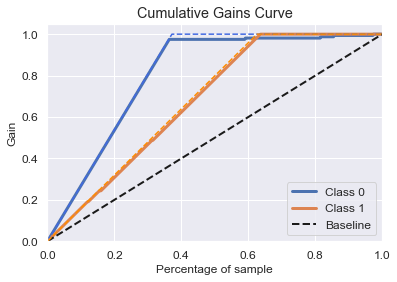

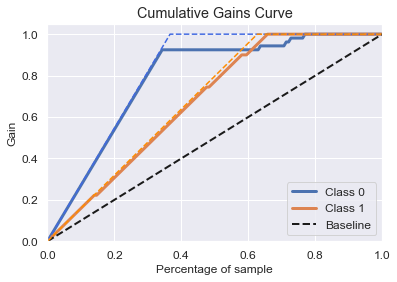

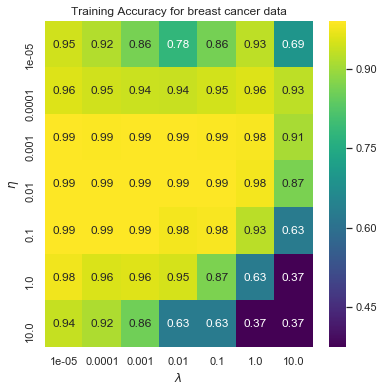

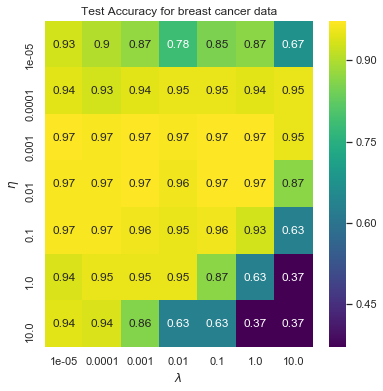

 11%|█         | 1/9 [00:46<06:15, 47.00s/it]

Number of hidden layers: 2


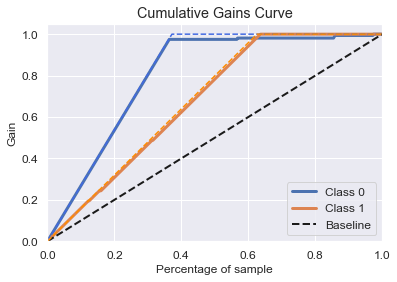

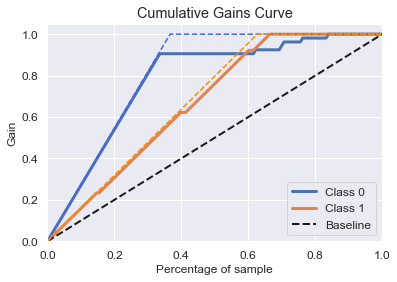

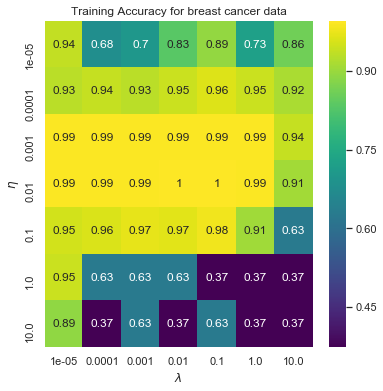

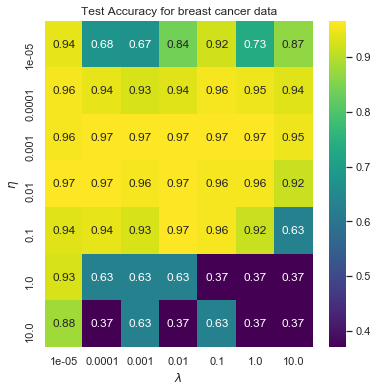

 22%|██▏       | 2/9 [01:55<06:14, 53.55s/it]

Number of hidden layers: 3


/Users/ohebbi/Documents/UiO /H19/FYS-STK4155/project2/functions/hiddenlayer.py:57: RuntimeWarning: overflow encountered in multiply
  self.weights -= eta * self.weights_gradient


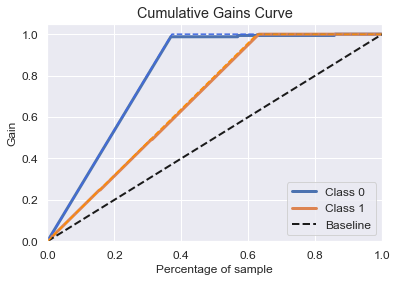

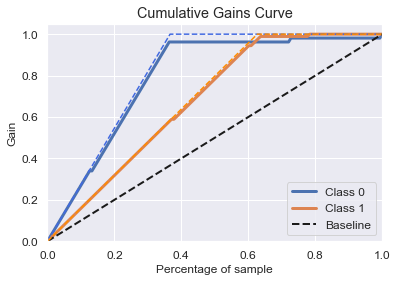

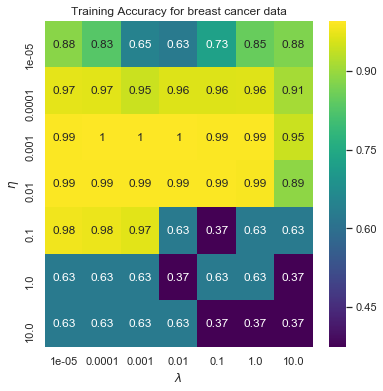

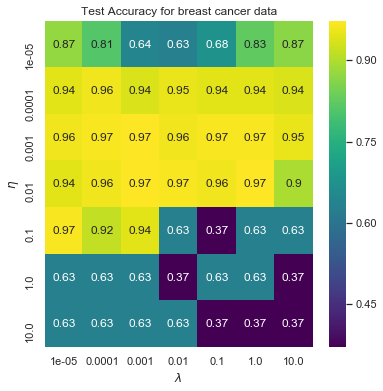

 33%|███▎      | 3/9 [03:39<06:51, 68.66s/it]

Number of hidden layers: 4


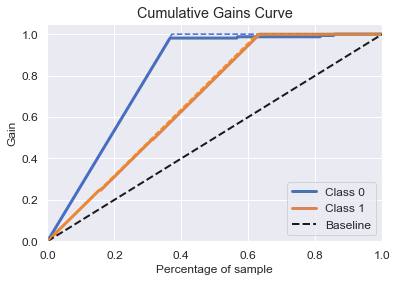

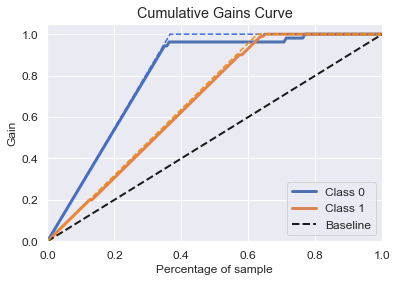

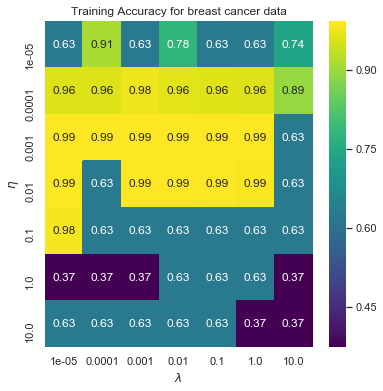

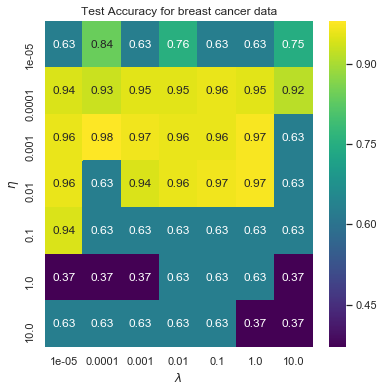

 44%|████▍     | 4/9 [05:38<06:57, 83.55s/it]

Number of hidden layers: 5


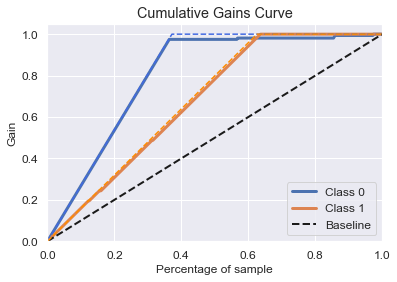

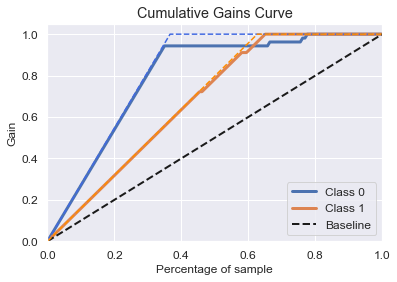

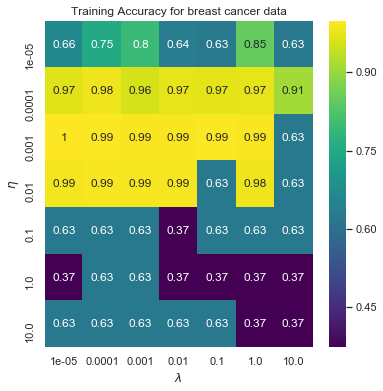

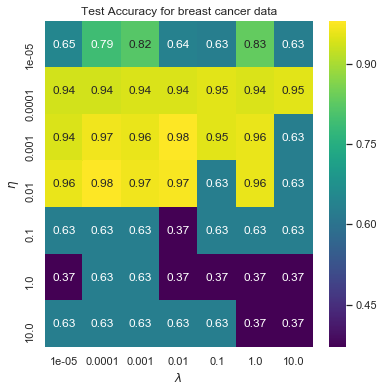

 56%|█████▌    | 5/9 [07:55<06:38, 99.69s/it]

Number of hidden layers: 6


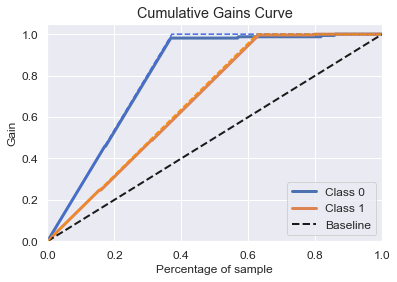

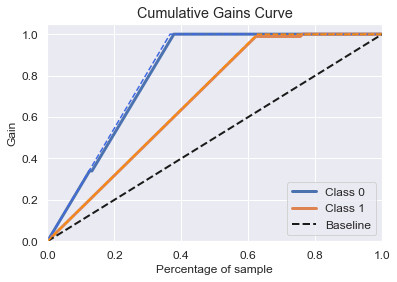

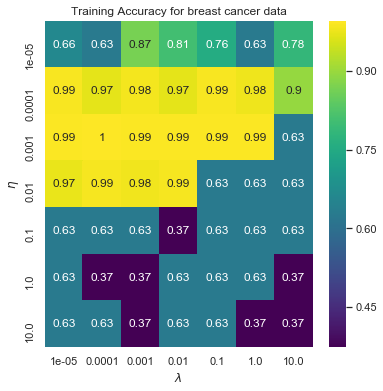

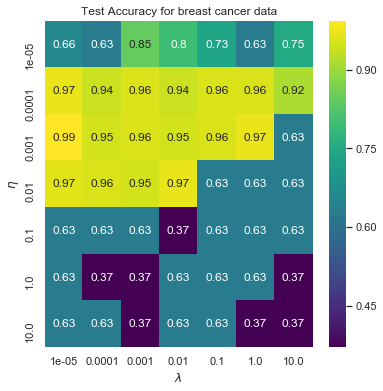

 67%|██████▋   | 6/9 [10:23<05:42, 114.14s/it]

Number of hidden layers: 7


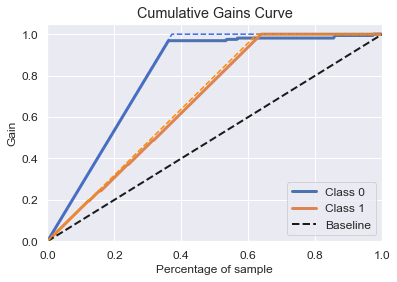

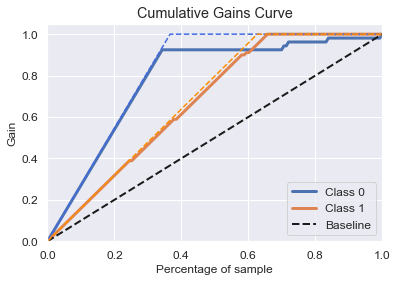

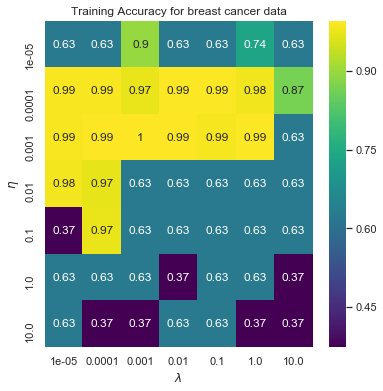

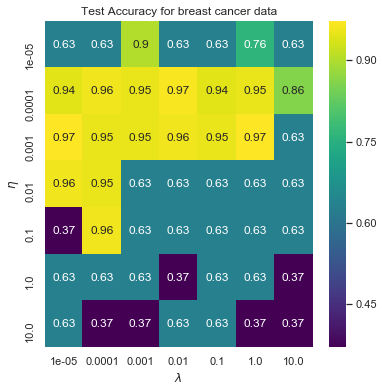

 78%|███████▊  | 7/9 [13:14<04:22, 131.16s/it]

Number of hidden layers: 8


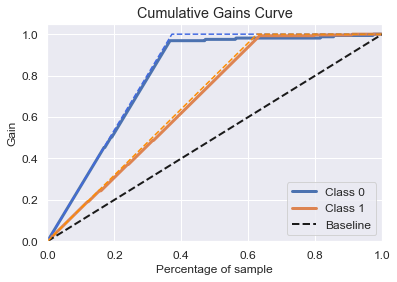

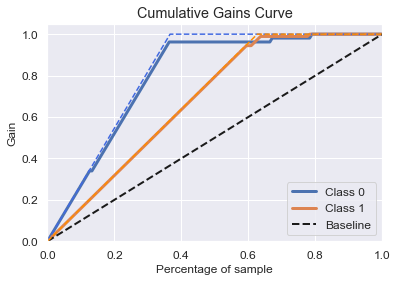

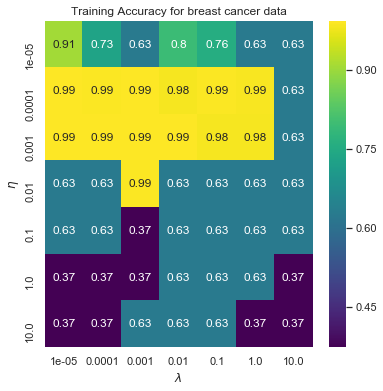

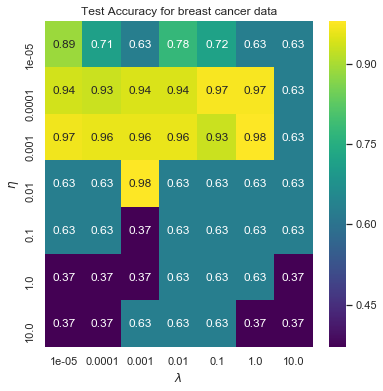

 89%|████████▉ | 8/9 [16:42<02:34, 154.36s/it]

Number of hidden layers: 9


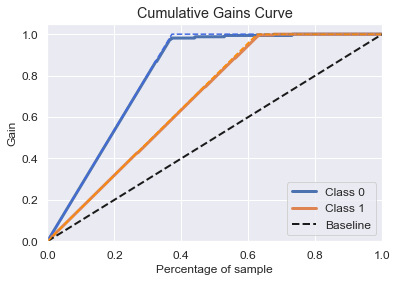

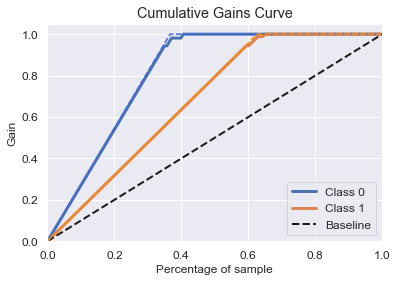

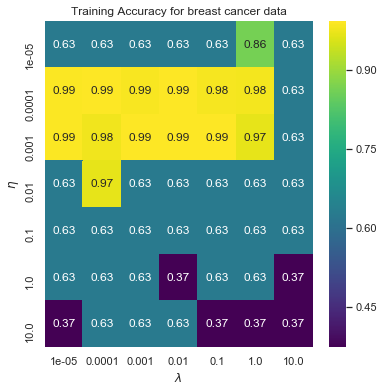

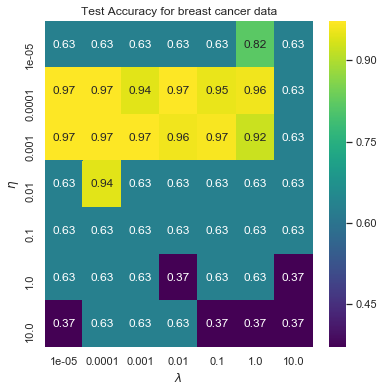

100%|██████████| 9/9 [20:37<00:00, 137.55s/it]


In [107]:
for n_hidden_layers in tqdm.tqdm(range(1,10)):
    print ("Number of hidden layers:", n_hidden_layers)
    run_neuralnetwork()

Here we can see that the best number of hidden layers are $6$ with $\eta=10^{-3}$ and $\lambda=10^{-5}$.

  0%|          | 0/9 [00:00<?, ?it/s]

Number of neurons to each hidden layer: 10


/Users/ohebbi/Documents/UiO /H19/FYS-STK4155/project2/functions/functions.py:128: RuntimeWarning: overflow encountered in exp
  return 1./(1.+np.exp(-x))
/Users/ohebbi/Documents/UiO /H19/FYS-STK4155/project2/functions/hiddenlayer.py:23: RuntimeWarning: overflow encountered in matmul
  self.z_h = np.matmul(X_data, self.weights) + self.bias
/Users/ohebbi/Documents/UiO /H19/FYS-STK4155/project2/functions/hiddenlayer.py:23: RuntimeWarning: invalid value encountered in matmul
  self.z_h = np.matmul(X_data, self.weights) + self.bias
/Users/ohebbi/Documents/UiO /H19/FYS-STK4155/project2/functions/hiddenlayer.py:54: RuntimeWarning: overflow encountered in multiply
  self.weights_gradient += lmbd * self.weights
/Users/ohebbi/Documents/UiO /H19/FYS-STK4155/project2/functions/hiddenlayer.py:57: RuntimeWarning: overflow encountered in multiply
  self.weights -= eta * self.weights_gradient
/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passin

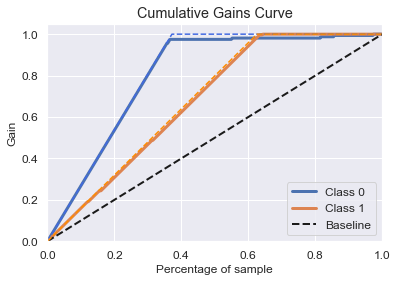

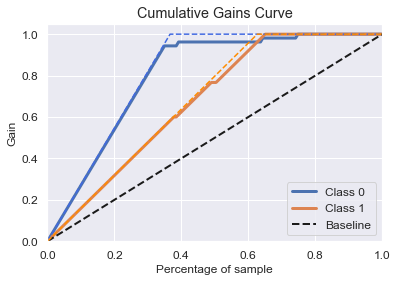

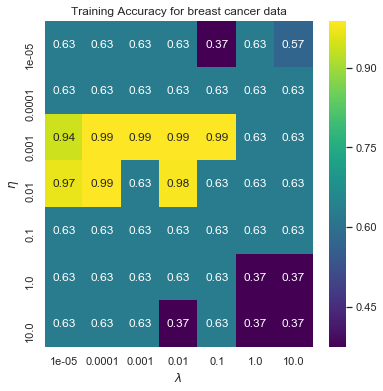

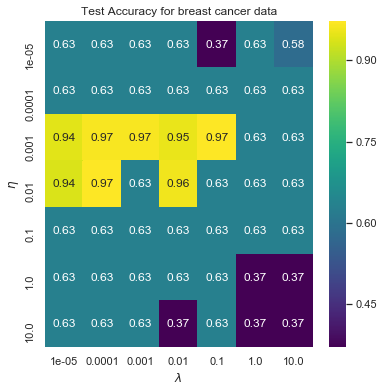

 11%|█         | 1/9 [01:13<09:44, 73.07s/it]

Number of neurons to each hidden layer: 20


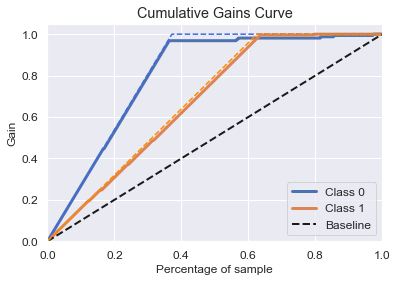

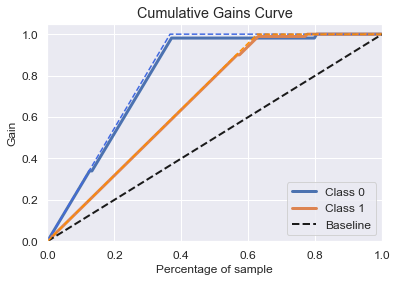

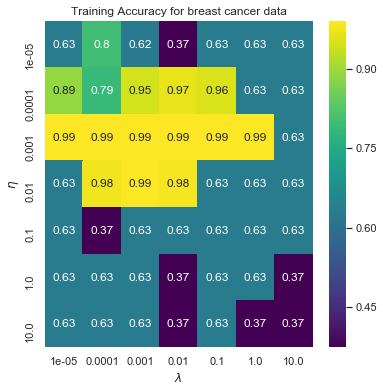

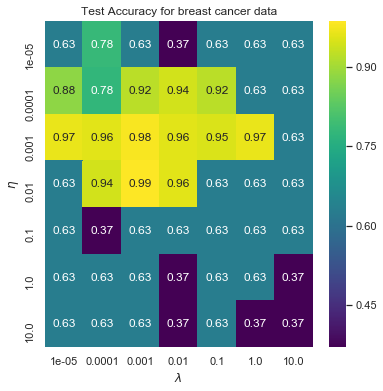

 22%|██▏       | 2/9 [02:40<09:02, 77.47s/it]

Number of neurons to each hidden layer: 30


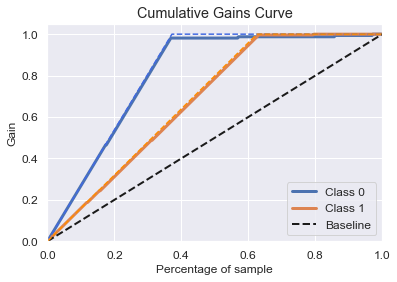

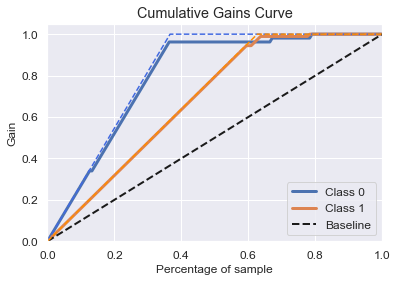

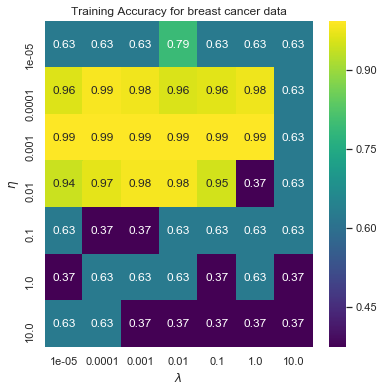

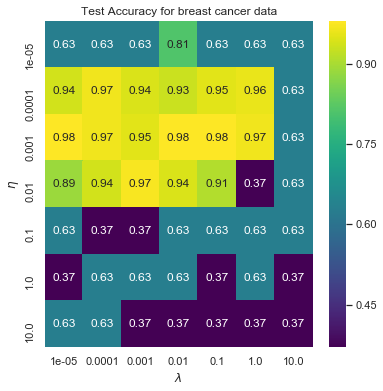

 33%|███▎      | 3/9 [04:18<08:21, 83.60s/it]

Number of neurons to each hidden layer: 40


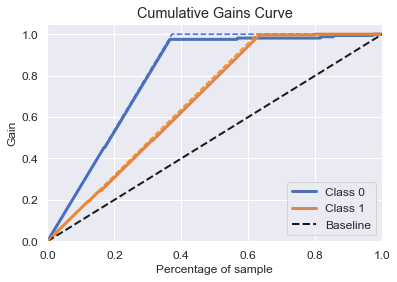

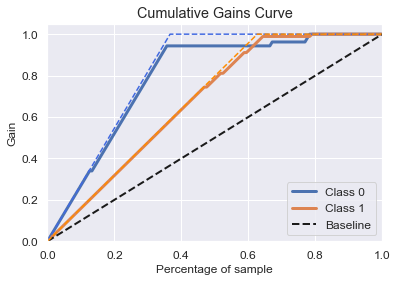

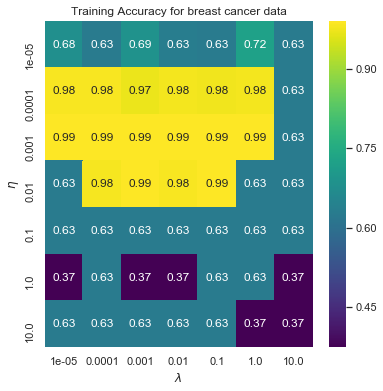

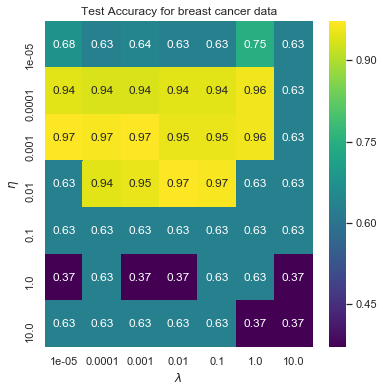

 44%|████▍     | 4/9 [06:32<08:13, 98.69s/it]

Number of neurons to each hidden layer: 50


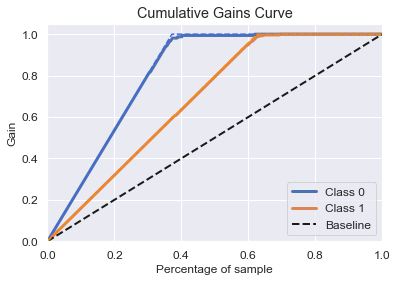

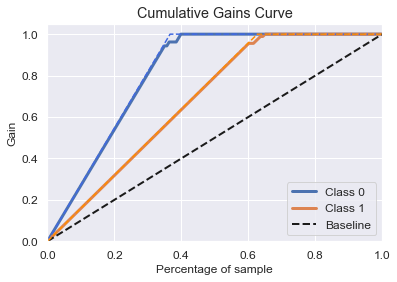

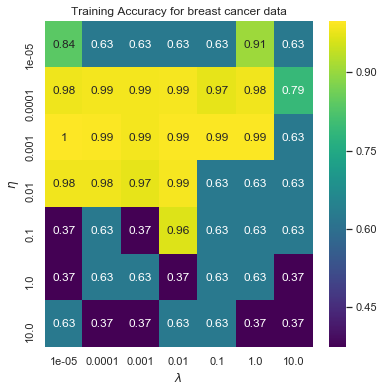

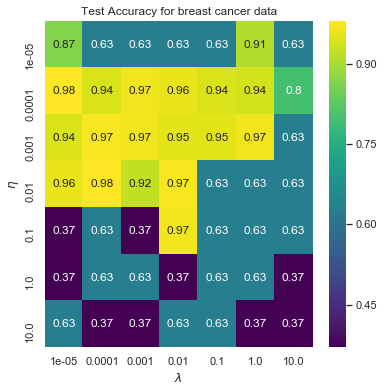

 56%|█████▌    | 5/9 [09:06<07:40, 115.18s/it]

Number of neurons to each hidden layer: 60


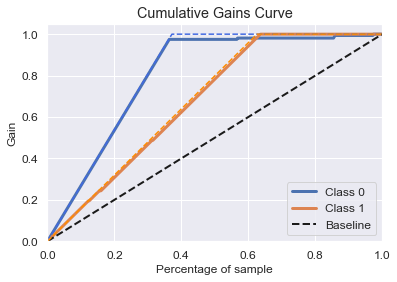

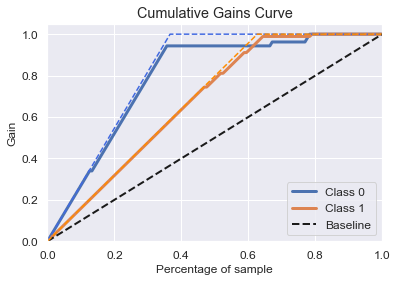

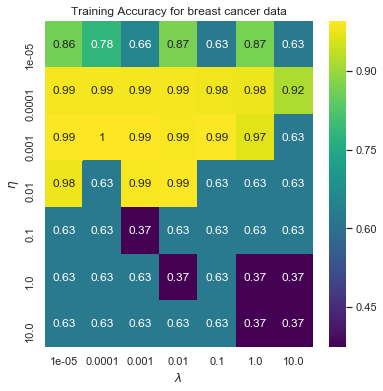

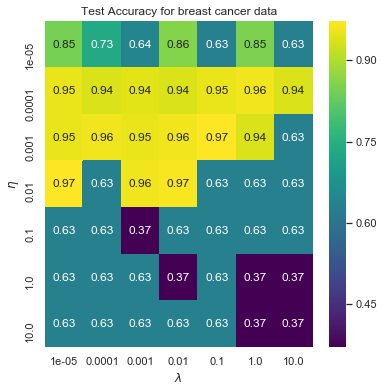

 67%|██████▋   | 6/9 [11:43<06:23, 127.84s/it]

Number of neurons to each hidden layer: 70


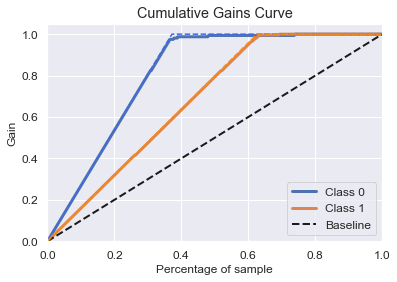

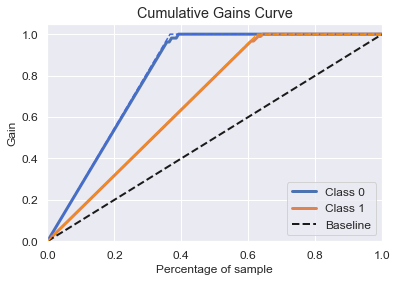

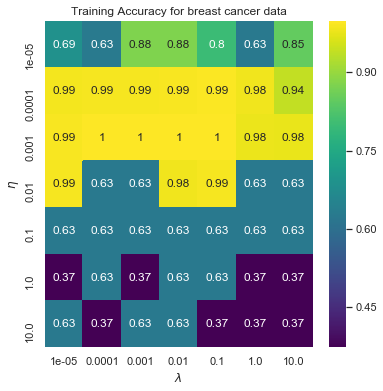

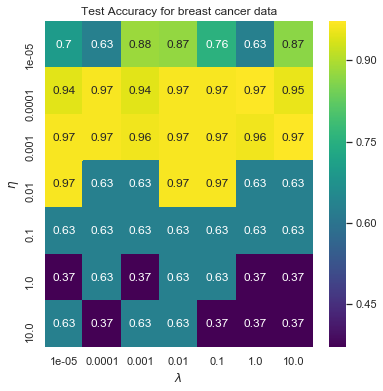

 78%|███████▊  | 7/9 [14:54<04:53, 146.83s/it]

Number of neurons to each hidden layer: 80


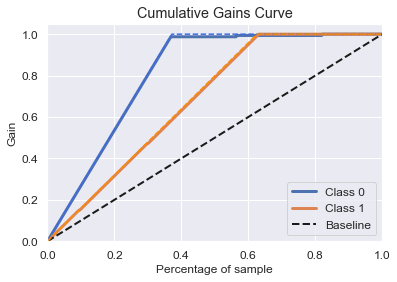

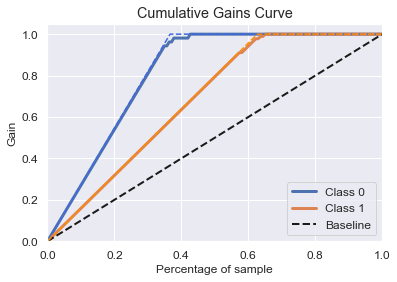

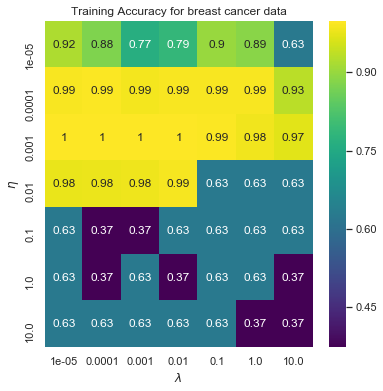

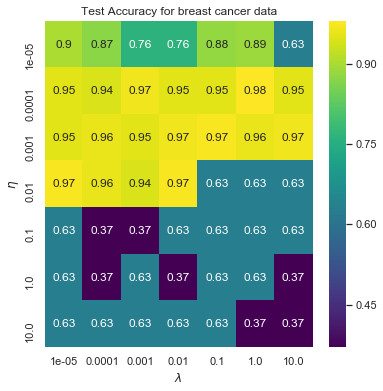

 89%|████████▉ | 8/9 [18:20<02:44, 164.55s/it]

Number of neurons to each hidden layer: 90


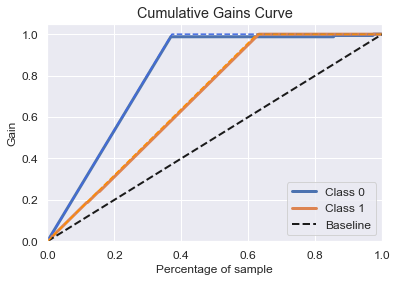

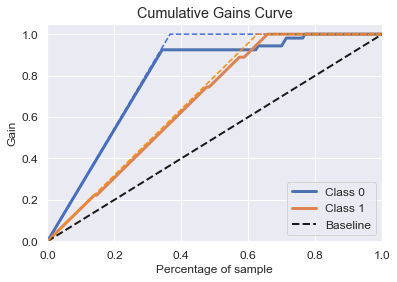

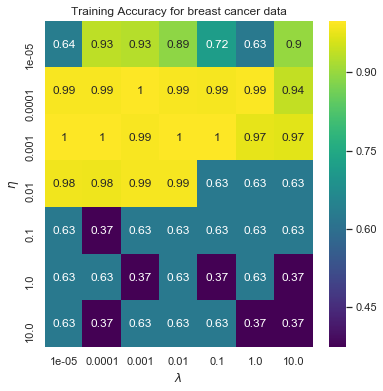

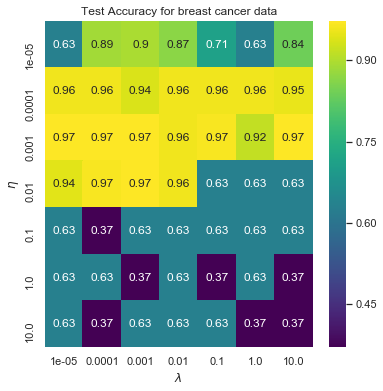

100%|██████████| 9/9 [21:06:24<00:00, 8442.71s/it] 


In [108]:
n_hidden_layers = 6
for n_hidden_neurons in tqdm.tqdm(range(10,100,10)):
    print ("Number of neurons to each hidden layer:", n_hidden_neurons)
    run_neuralnetwork()

In [ ]:
n_hidden_neurons = 50
for batch_size in tqdm.tqdm(range(20,200,20)):
    print ("Number of batch_size:", batch_size)
    run_neuralnetwork()

In [ ]:
batch_size = 50
for epochs in tqdm.tqdm(range(20,200,20)):
    print ("Number of epochs:", epochs)
    run_neuralnetwork()